

You are given a CIFAR10 dataset from torch. You tasks are:
- Create an Artificial Neural Network (ANN) model that can classify the images to specific class.
- Clearly define the architecture of your ANN model, specifying the number of layers, neurons, and activation functions.
- Make two version of your model with different number of layers and hidden neurons
- Train the model on the prepared data and evaluate its performance on a separate validation set.
- Track the training loss during training and plot it to visualize the learning process.

- Plot some samples predictions from the trained model.

In [1]:
from IPython.display import clear_output

In [13]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, models
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random

In [14]:
## Dataset:
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [15]:
val_size = int(0.1 * len(train_dataset))
train_size = len(train_dataset) - val_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

In [16]:
b_size = 32
train_loader = DataLoader(train_dataset, batch_size=b_size, shuffle=True)
val_loader =   DataLoader(val_dataset, batch_size=b_size, shuffle=True)
test_loader =  DataLoader(test_dataset, batch_size=b_size, shuffle=True)

In [23]:
class ANN(nn.Module):
    def __init__(self,input_dim, out_dim):
        super(ANN,self).__init__()
        self.Linear1 = nn.Linear(input_dim,256)
        self.Linear2 = nn.Linear(256,128)
        self.Linear3 = nn.Linear(128,64)
        self.Linear4 = nn.Linear(64,32)
        self.Linear5 = nn.Linear(32,16)
        self.Linear6 = nn.Linear(16,out_dim)
        self.Relu = nn.ReLU()

    def forward(self,x):
       x = torch.flatten(x, 1)
       x = self.Linear1(x)
       x = self.Relu(x)
       x = self.Linear2(x)
       x = self.Relu(x)
       x = self.Linear3(x)
       x = self.Relu(x)
       x = self.Linear4(x)
       x = self.Relu(x)
       x = self.Linear5(x)
       x = self.Relu(x)
       x = self.Linear6(x)
       return x

In [24]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

learning_rate = 0.001
num_epochs = 10
input_dim = 32*32*3
out_dim =10

model = ANN(input_dim, out_dim).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [25]:
# Training loop
num_epochs = 10
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)
    training_accuracy = 100 * correct / total

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_dataset)
    val_losses.append(val_loss)
    val_accuracy = 100 * correct / total
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f} - Train Accuracy: {training_accuracy:.2f}% - Val Loss: {val_loss:.4f} - Val Accuracy: {val_accuracy:.2f}%')

Epoch 1/10, Train Loss: 2.0021 - Train Accuracy: 24.09% - Val Loss: 1.9041 - Val Accuracy: 28.58%
Epoch 2/10, Train Loss: 1.8065 - Train Accuracy: 34.10% - Val Loss: 1.7162 - Val Accuracy: 37.84%
Epoch 3/10, Train Loss: 1.6996 - Train Accuracy: 38.36% - Val Loss: 1.6746 - Val Accuracy: 39.30%
Epoch 4/10, Train Loss: 1.6311 - Train Accuracy: 41.32% - Val Loss: 1.6436 - Val Accuracy: 41.00%
Epoch 5/10, Train Loss: 1.5774 - Train Accuracy: 43.38% - Val Loss: 1.5537 - Val Accuracy: 43.12%
Epoch 6/10, Train Loss: 1.5428 - Train Accuracy: 44.83% - Val Loss: 1.5496 - Val Accuracy: 44.34%
Epoch 7/10, Train Loss: 1.5151 - Train Accuracy: 45.94% - Val Loss: 1.5253 - Val Accuracy: 45.10%
Epoch 8/10, Train Loss: 1.4884 - Train Accuracy: 46.77% - Val Loss: 1.5606 - Val Accuracy: 44.62%
Epoch 9/10, Train Loss: 1.4595 - Train Accuracy: 47.78% - Val Loss: 1.5568 - Val Accuracy: 44.92%
Epoch 10/10, Train Loss: 1.4411 - Train Accuracy: 48.42% - Val Loss: 1.4764 - Val Accuracy: 47.14%


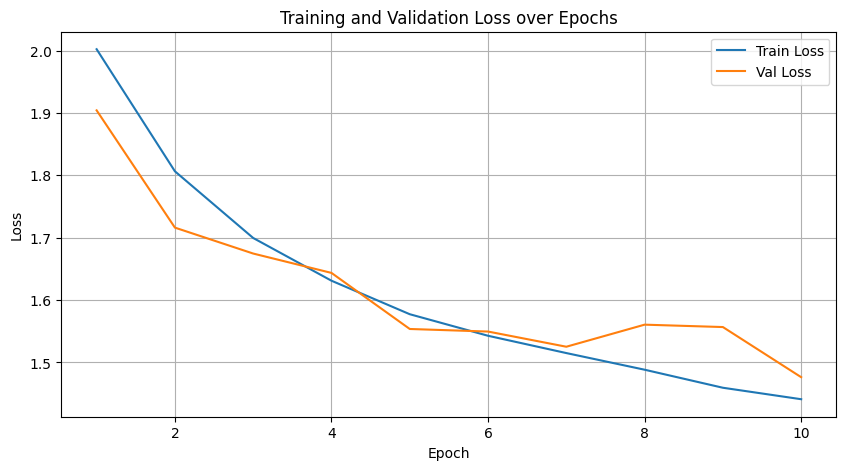

In [26]:
# Plotting the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Val Loss')
plt.title(f'Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Test the model
model.eval()
test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        test_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss = test_loss / len(test_dataset)
test_accuracy = 100 * correct / total
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

Test Loss: 1.4833, Test Accuracy: 46.95%


In [29]:
# Example: Load a batch from DataLoader
dataiter = iter(test_loader)
images, labels = next(dataiter)
images = images.to(device)
# Example: Apply model to batch of images
outputs = model(images)
_, predicted = torch.max(outputs.data, 1)  # Get the index of the class with the highest probability
# Convert tensors to numpy arrays for plotting
images_np = images.cpu().numpy()
labels_true = labels.numpy()
labels_pred = predicted.cpu().numpy()

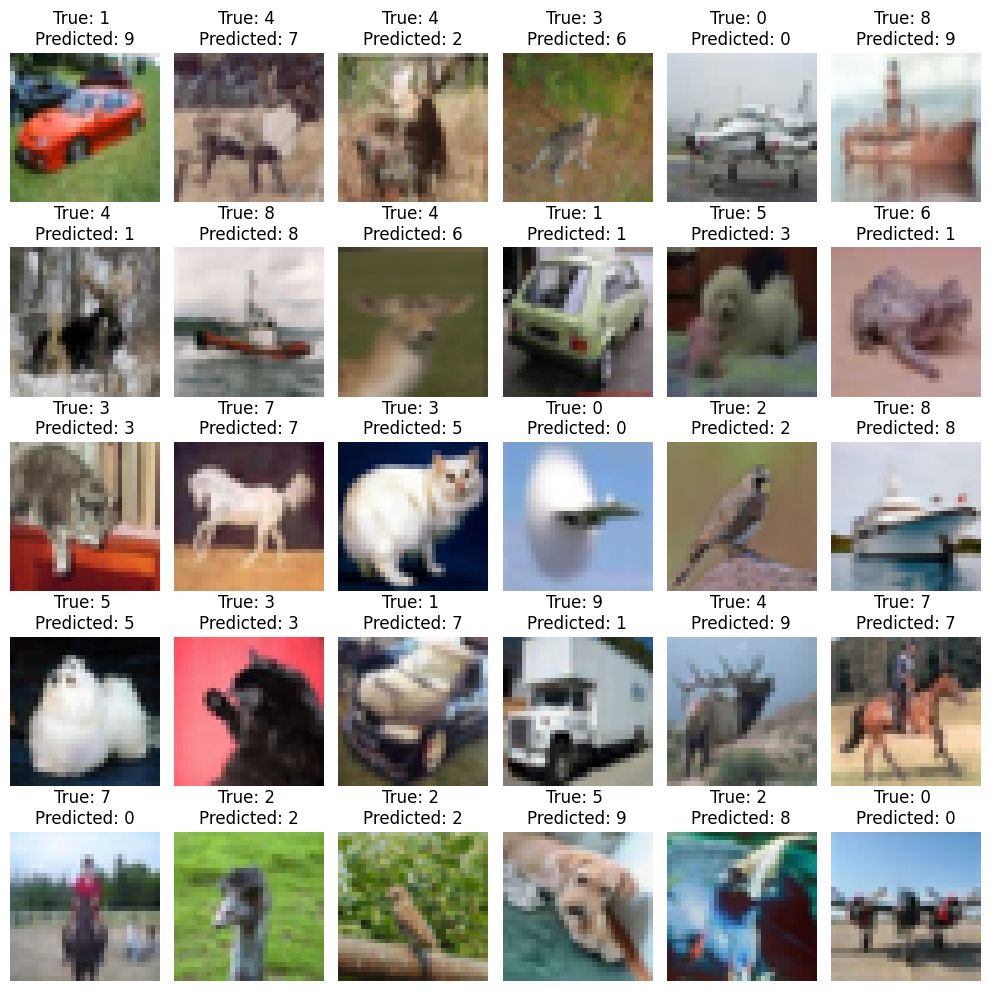

In [30]:
# Create a grid of images
num_images = len(images_np)
rows = int(np.sqrt(num_images))
cols = num_images // rows
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

if labels_pred is None:
    labels_pred = labels_true

for i, ax in enumerate(axes.flat):
    # Plot image
    ax.imshow(np.transpose(images_np[i], (1, 2, 0)), cmap='gray')
    ax.axis('off')

    # Show true and predicted labels
    ax_title = f"True: {labels_true[i]} \nPredicted: {labels_pred[i]}"
    ax.set_title(ax_title)

plt.tight_layout()
plt.show()